
# **VGGNet Code**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, utils
import numpy as np

# Data

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

# Model Architecture

In [10]:
model = models.Sequential()

# 1st conv block
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# 2nd conv block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# 3rd conv block
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# 4th conv block
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# 5th conv block
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
# output layer
model.add(layers.Dense(10, activation='softmax'))

# 모델 구조 출력
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

# Model compile

In [11]:
# categorical_crossentropy: 원-핫 인코딩된 레이블
# sparse_categorical_crossentropy : 정수 인코딩된 레이블
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [12]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/30
313/313 [==============================] - 23s 60ms/step - loss: 2.3035 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 2/30
313/313 [==============================] - 18s 59ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1022
Epoch 3/30
313/313 [==============================] - 18s 59ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 4/30
313/313 [==============================] - 19s 59ms/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 5/30
313/313 [==============================] - 19s 59ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/30
313/313 [==============================] - 19s 60ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/30
313/313 [==============================] - 19s 60ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy:

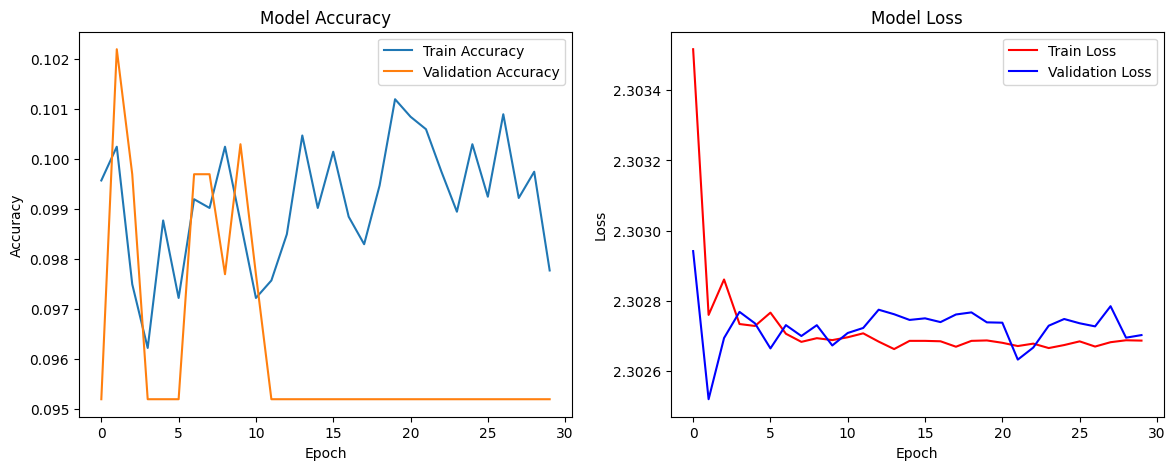

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1st graph : accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper right')

# 2nd graph : loss
ax2.plot(history.history['loss'], label='Train Loss', color='r')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='b')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.show()